In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
sample=pd.read_csv("Downloads/sample.csv")
sample

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [4]:
test=pd.read_csv("Downloads/test.csv/test.csv")
train=pd.read_csv("Downloads/train.csv/train.csv")

In [5]:
print(test.shape)
print(train.shape)

(28000, 784)
(42000, 785)


In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

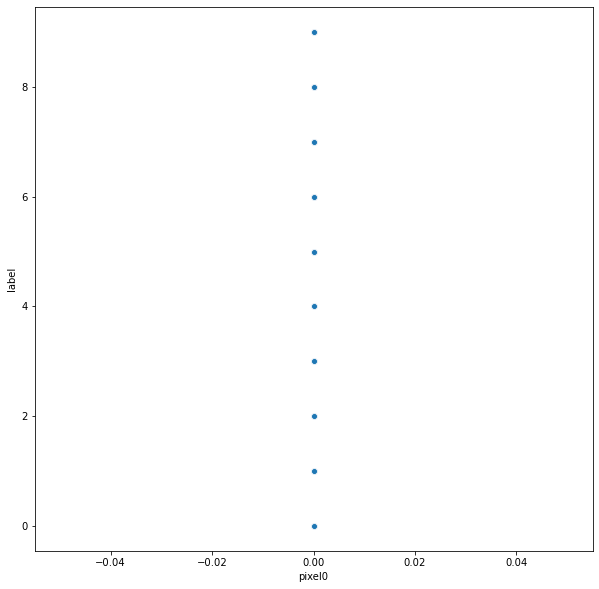

In [8]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['pixel0'],y=train['label'])
plt.show()


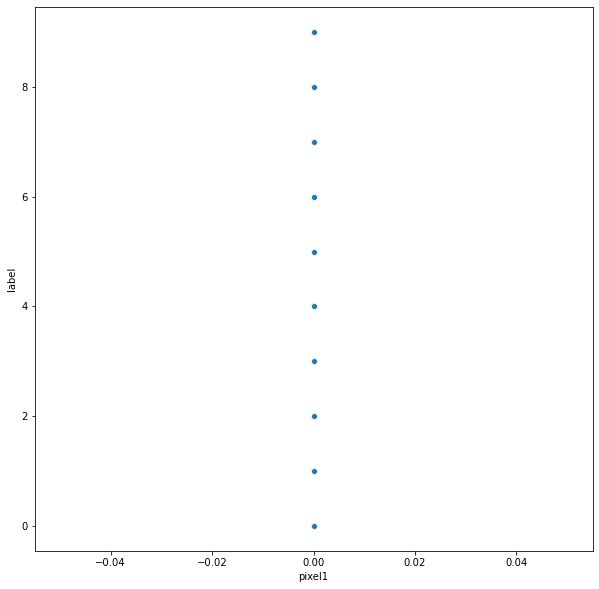

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['pixel1'],y=train['label'])
plt.show()

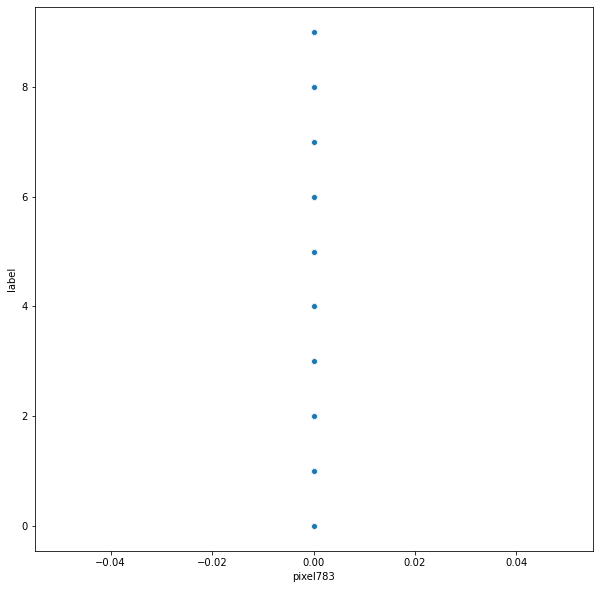

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['pixel783'],y=train['label'])
plt.show()

### no outliers found

In [11]:
x=train.iloc[:,1:]
y=train.iloc[:,0]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.5,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(21000, 784) (21000, 784) (21000,) (21000,)


In [12]:
log_reg_model = LogisticRegression(max_iter=1000, solver = "saga")
log_reg_model.fit(x_train, y_train)

C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=1000, solver='saga')

In [13]:
y_pred=log_reg_model.predict(x_test)


In [15]:
accuracy_score(y_test,y_pred)

0.8928095238095238

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2064
           1       0.95      0.97      0.96      2355
           2       0.88      0.86      0.87      2132
           3       0.87      0.87      0.87      2191
           4       0.90      0.91      0.90      2026
           5       0.84      0.81      0.82      1894
           6       0.91      0.93      0.92      2077
           7       0.92      0.91      0.92      2191
           8       0.84      0.84      0.84      1991
           9       0.87      0.87      0.87      2079

    accuracy                           0.89     21000
   macro avg       0.89      0.89      0.89     21000
weighted avg       0.89      0.89      0.89     21000



In [17]:
print(confusion_matrix(y_test,y_pred))

[[1951    0   22    8    2   26   36    1   16    2]
 [   1 2278   15   11    2    8    9    4   22    5]
 [  18   35 1825   60   29   26   45   23   57   14]
 [  12    9   64 1904    3   87    8   30   48   26]
 [  16   14   18    2 1842    8   19   15   20   72]
 [  32   20   19  100   17 1531   46    6   99   24]
 [  20    2   33    2   40   29 1937    1   12    1]
 [  13    6   33   23   25    4    1 2002   13   71]
 [  10   40   43   64   14   80   20    6 1667   47]
 [  17    3    5   23   80   23    1   88   27 1812]]
